Understanding Descriptive Statistics with python

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [160]:
path="house_prices.csv"
df = pd.read_csv(path)

In [80]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,2008,250000


In [81]:
df.shape

(1379, 35)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 35 columns):
LotFrontage      1379 non-null float64
LotArea          1379 non-null int64
OverallQual      1379 non-null int64
OverallCond      1379 non-null int64
YearBuilt        1379 non-null int64
YearRemodAdd     1379 non-null int64
MasVnrArea       1379 non-null float64
BsmtFinSF1       1379 non-null int64
BsmtFinSF2       1379 non-null int64
BsmtUnfSF        1379 non-null int64
TotalBsmtSF      1379 non-null int64
1stFlrSF         1379 non-null int64
2ndFlrSF         1379 non-null int64
LowQualFinSF     1379 non-null int64
GrLivArea        1379 non-null int64
BsmtFullBath     1379 non-null int64
BsmtHalfBath     1379 non-null int64
FullBath         1379 non-null int64
HalfBath         1379 non-null int64
BedroomAbvGr     1379 non-null int64
KitchenAbvGr     1379 non-null int64
TotRmsAbvGrd     1379 non-null int64
Fireplaces       1379 non-null int64
GarageYrBlt      1379 non-null float64

Mean:  185479.51124 
Median:  167500.0 
Mode:  140000


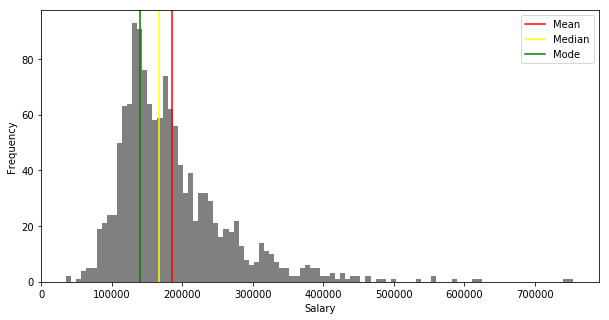

In [83]:
saleprice = df['SalePrice']

mean=saleprice.mean()
median=saleprice.median()
mode=saleprice.mode()

print'Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0]
plt.figure(figsize=(10,5))
plt.hist(sa,bins=100,color='grey')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [84]:
saleprice.cumsum().head()

0     208500
1     390000
2     613500
3     753500
4    1003500
Name: SalePrice, dtype: int64

Measures to find the spread of data

In [85]:
saleprice.min() #maximum value of salePrice

35311

In [86]:
saleprice.max() #minimum value of salePrice

755000

In [88]:
#Range
saleprice.max()-saleprice.min()

719689

In [89]:
#variance
saleprice.var()

6244775285.521461

In [115]:
from math import sqrt

#standard deviation
std = sqrt(saleprice.var())
std

79023.89059975129

In [91]:
#skewness
saleprice.skew()

1.9353620983631321

In [92]:
#kutosis
saleprice.kurt()

6.7356493372675592

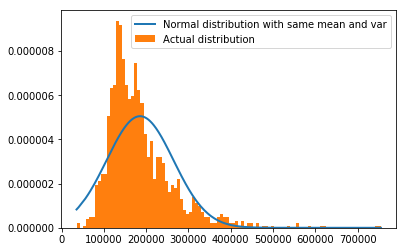

In [93]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(df['SalePrice'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show() 

We can see int the above graph that it is positively skewed with skewness score 1.93 and also has positive kurtosis(k=6.735)

             LotArea  GrLivArea  GarageArea  SalePrice
LotArea     1.000000   0.257243    0.167622   0.252921
GrLivArea   0.257243   1.000000    0.478811   0.708172
GarageArea  0.167622   0.478811    1.000000   0.608405
SalePrice   0.252921   0.708172    0.608405   1.000000


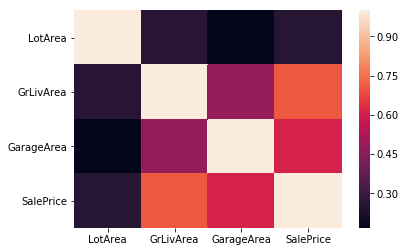

In [109]:
#checking correlation of 4 countinous variables
import seaborn as sns
%matplotlib inline
corelation=df[['LotArea','GrLivArea','GarageArea','SalePrice']].corr()
print corelation

sns.heatmap(corelation)

In [112]:
#covariance
df[['LotArea','GrLivArea','GarageArea','SalePrice']].cov().head()

,LotArea,GrLivArea,GarageArea,SalePrice
LotArea,1.043401e+08,1.364127e+06,3.179236e+05,2.041596e+08
GrLivArea,1.364127e+06,2.695069e+05,4.615466e+04,2.905241e+07
GarageArea,3.179236e+05,4.615466e+04,3.447726e+04,8.927251e+06
SalePrice,2.041596e+08,2.905241e+07,8.927251e+06,6.244775e+09


In [96]:
# #50 percentile i.e median
# np.percentile(df['salary'], 50)

saleprice.quantile(0.5)

167500.0

In [30]:
# q75 = np.percentile(df['salary'], 75)
# q75

q3 = saleprice.quantile(0.75)
q3

217750.0

In [31]:
#25th percentile
# q25 = np.percentile(df['salary'], 25)
q1 = saleprice.quantile(0.25)
q1

134000.0

In [32]:
#interquartile range
IQR = q3  - q1
IQR

83750.0

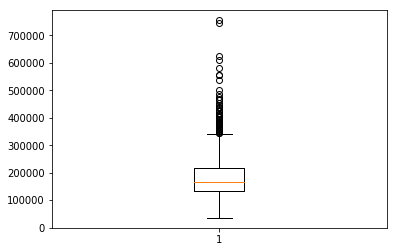

In [78]:
plt.boxplot(saleprice)
plt.show()